In [79]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams["font.family"] = "Helvetica Neue"
plt.rcParams["font.size"] = 14

FUNCTION TO READ GROMACS XVG

In [55]:
# Defining a function to read data from a file and return a numpy array
def read_data_xvg(filename):
    with open(filename) as f:
        content = f.read().splitlines()
        # Ignoring the comment lines
        content = [row for row in content if not row.startswith("#") and not row.startswith("@")]
        # Converting each row to a list of floats
        data = []
        for row in content:
                cols = row.split()[:2]
                data.append([float(col) for col in cols])
    return np.array(data)


READ RAMA OUTPUT

In [56]:
# Reading the data from the single file
data = read_data_xvg("./rama.xvg")
# Split data into 10 arrays, each with every 10th row (each one one amino acid)
split_data = [data[i::10] for i in range(10)]

SEQUENCE = ["SER-2","SER-3","HIS-4","HIS-5","GLN-6","PRO-7","LYS-8","GLY-9","THR-10","ASN-11"]

PLOT ONE RAMA PLOT PER AMINO ACID

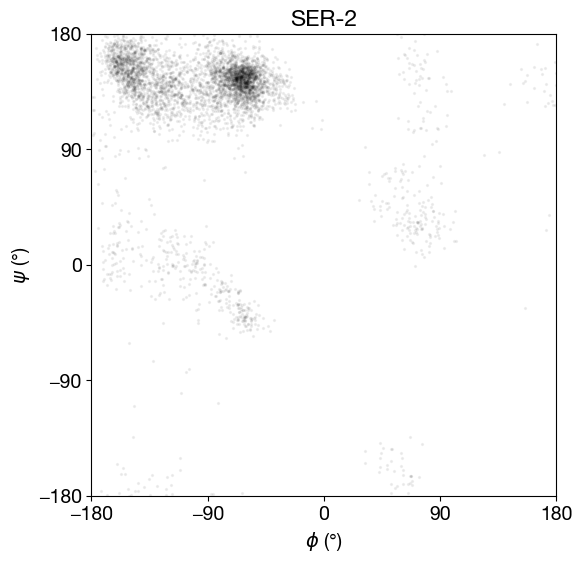

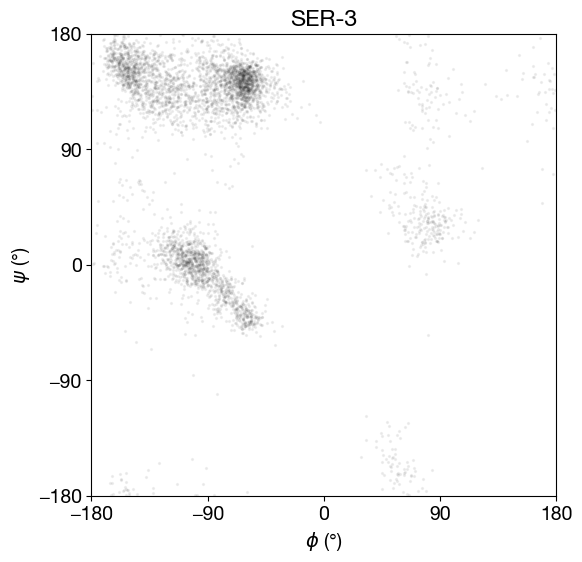

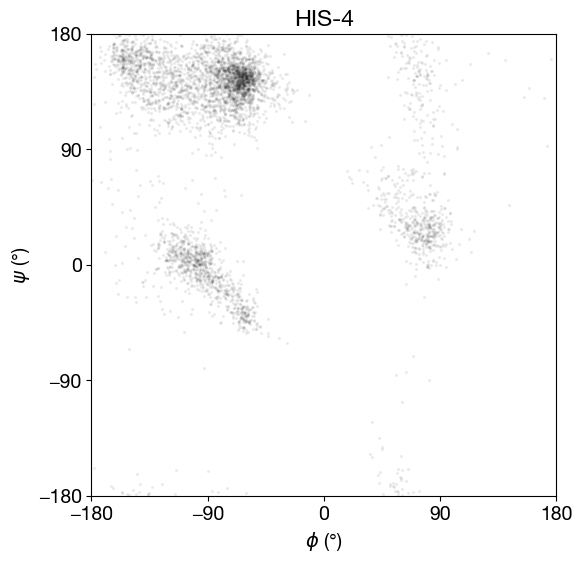

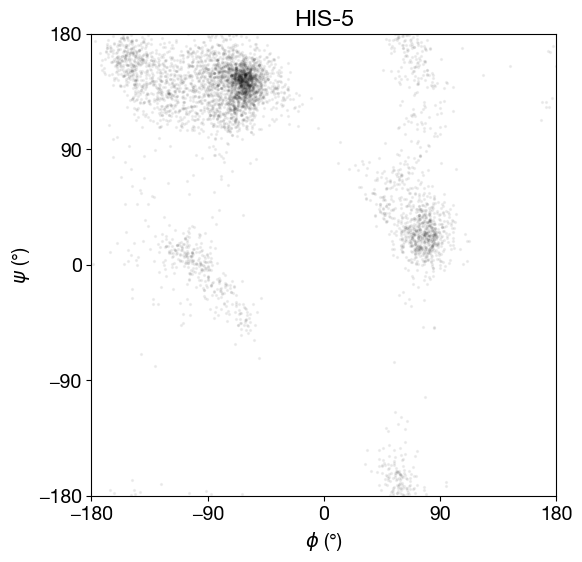

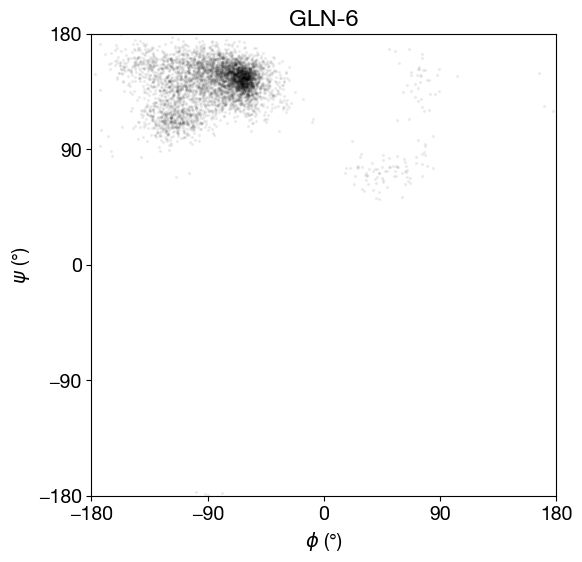

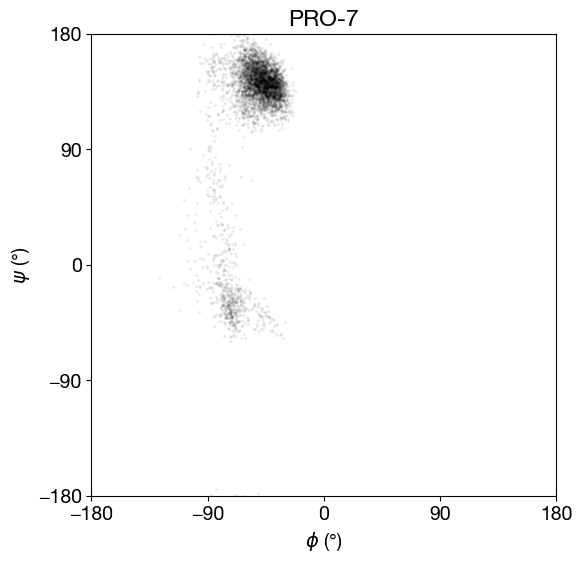

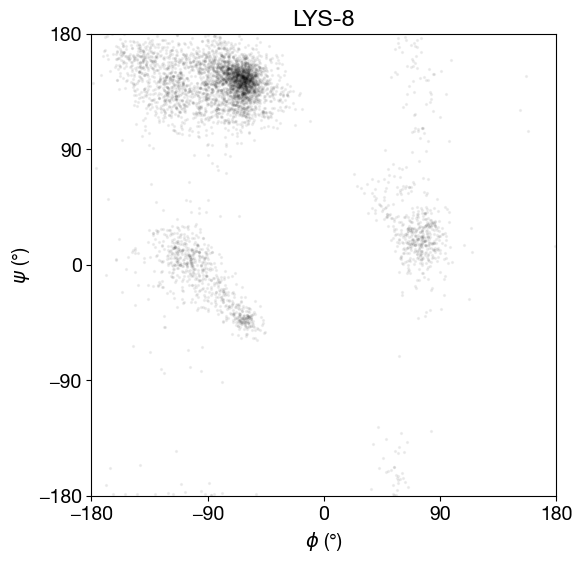

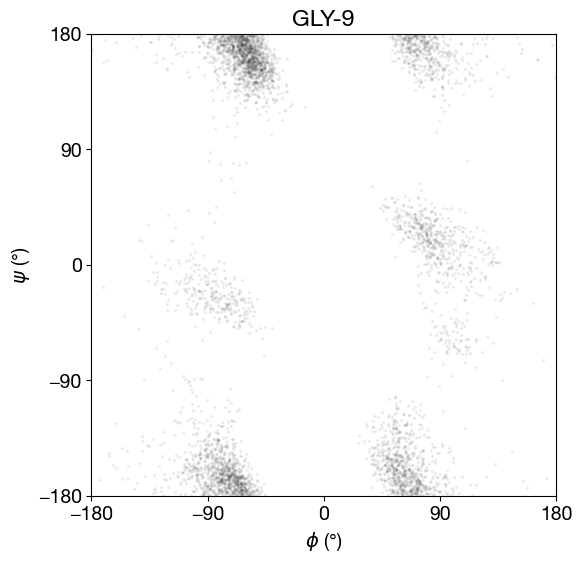

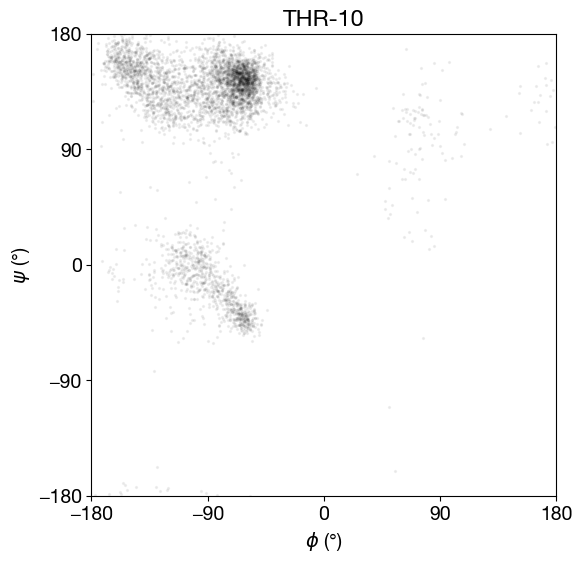

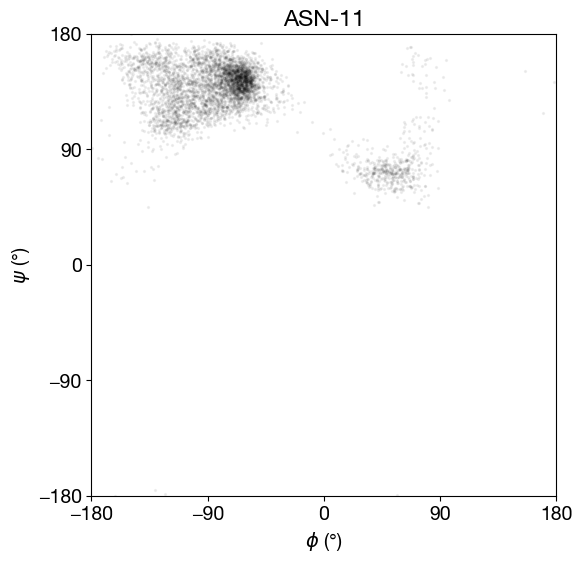

In [80]:
for i, amino_acid_data in enumerate(split_data):
    # Extract phi and psi angles
    phi = amino_acid_data[:, 0]
    psi = amino_acid_data[:, 1]
    # Plot Ramachandran plot
    fig = plt.figure(figsize=(6 ,6) ,facecolor='w')
    plt.scatter(phi, psi, s=2, alpha=0.05, color="black")
    plt.xlabel(r'$\phi$ (°)')
    plt.ylabel(r'$\psi$ (°)')
    plt.xlim(-180, 180)
    plt.ylim(-180, 180)
    plt.xticks([-180, -90, 0, 90, 180])
    plt.yticks([-180, -90, 0, 90, 180])
    plt.title(SEQUENCE[i])
    # Saving each plot as an image file with 300 dpi resolution
    plt.savefig(f"rama_residue_{i+2}.png" ,dpi=300)

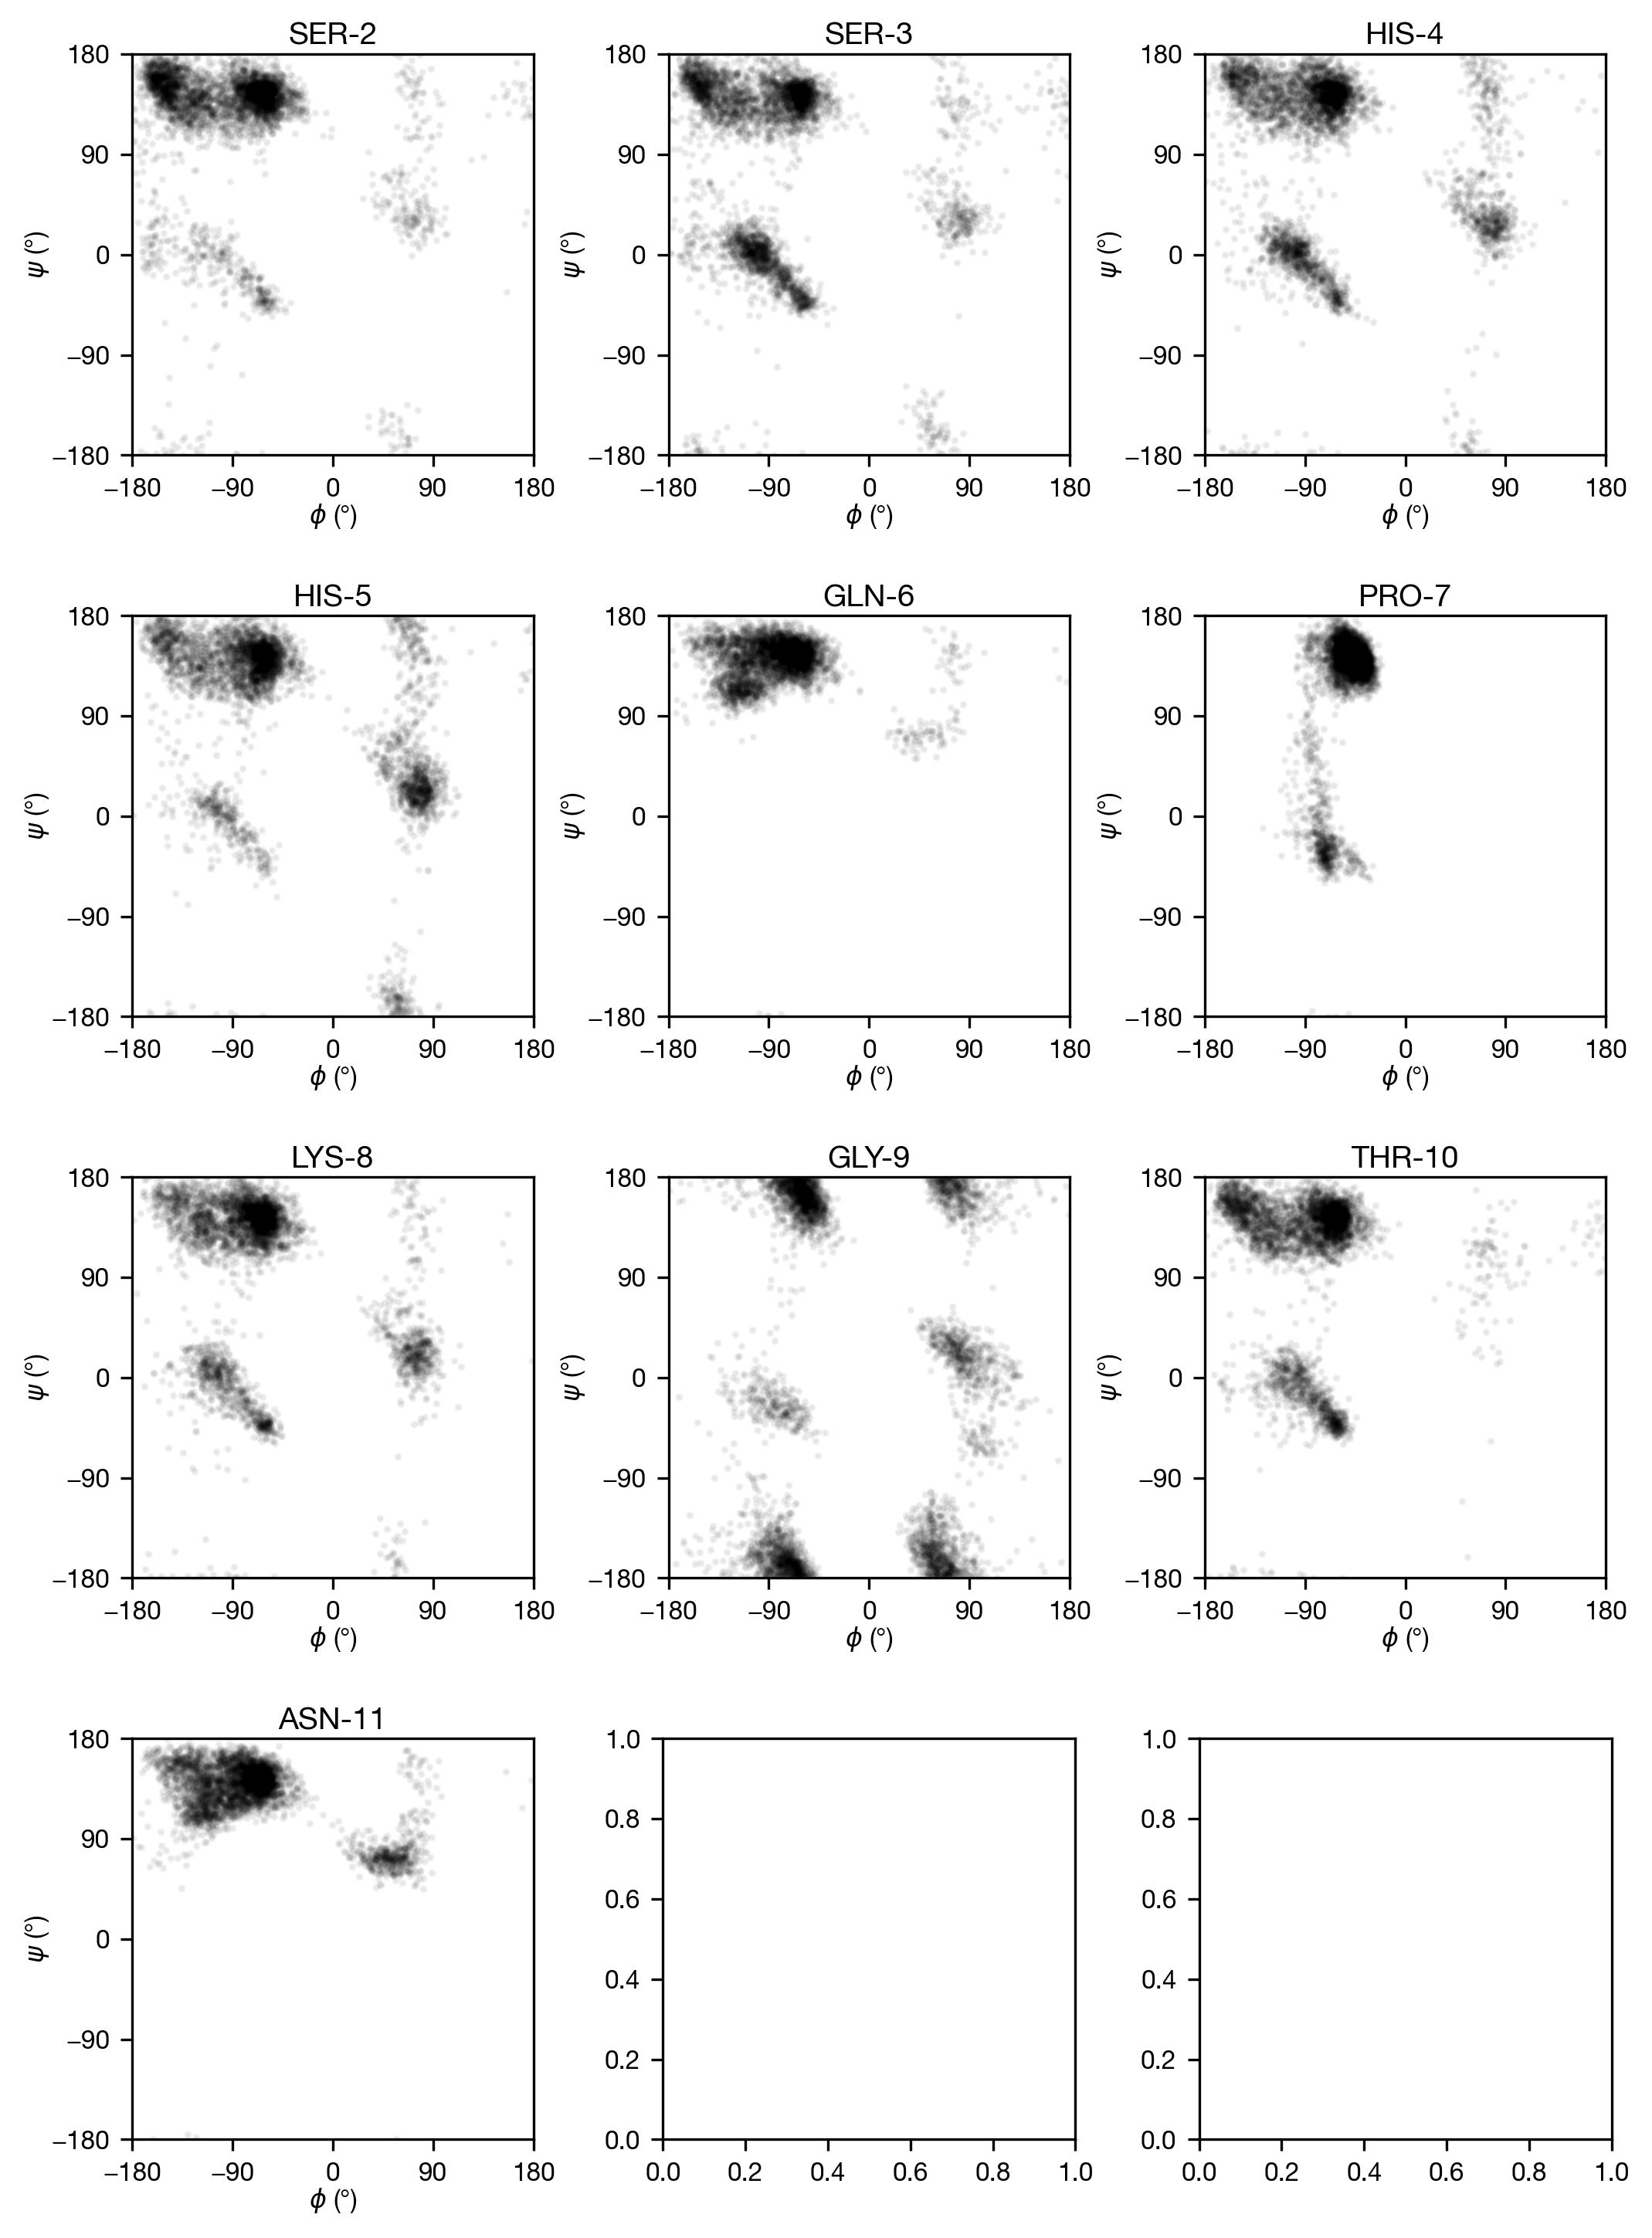

In [81]:
plt.rcParams["font.size"] = 8

# calculate number of rows and columns for the grid
n_plots = len(split_data)
n_cols = 3
n_rows = math.ceil(n_plots/n_cols)

# create figure and axes
fig, axs = plt.subplots(n_rows, n_cols, figsize=(8.27, 11.69), dpi=300)

# loop over the plots and fill the grid
for i, amino_acid_data in enumerate(split_data):
    # Extract phi and psi angles
    phi = amino_acid_data[:, 0]
    psi = amino_acid_data[:, 1]
    # Plot Ramachandran plot
    ax = axs[i // n_cols, i % n_cols] # get the correct axis
    ax.scatter(phi, psi, s=2, alpha=0.05, color="black")
    ax.set_xlabel(r'$\phi$ (°)', labelpad=0.1)
    ax.set_ylabel(r'$\psi$ (°)', labelpad=0.1)
    ax.set_xlim(-180, 180)
    ax.set_ylim(-180, 180)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-180, -90, 0, 90, 180])
    ax.set_title(SEQUENCE[i], pad=3)
    ax.set_aspect('equal') # set aspect ratio to square
# save figure as PDF
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.savefig("rama_plots.pdf")
